In [1]:
from crim_intervals import *
import pandas as pd
import ast
import matplotlib
from itertools import tee, combinations
import numpy as np

In [2]:
# THIS IS DEV COPY for use with CLOSE/EXACT Matches

import numpy as np

# Converts lists to tuples

def lists_to_tuples_a(el):
    if isinstance(el, list):
        return tuple(el)
    else:
        return el

# Filters for the length of the Presentation Type in the Classifier

def limit_offset_size(array, limit):
    under_limit = np.cumsum(array) <= limit
    return array[: sum(under_limit)]

# Gets the the list of offset differences for each group 

def get_offset_difference_list_a(group):
    # if we do sort values as part of the func call, then we don't need this first line
    group = group.sort_values("start_offset")
    group["next_offset"] = group.start_offset.shift(-1)
    offset_difference_list = (group.next_offset - group.start_offset).dropna().tolist()
    return offset_difference_list

# The classifications are done here
# be sure to have the offset difference limit set here and matched in gap check below  80 = ten bars

def classify_offsets_a(offset_difference_list):
    """
    Put logic for classifying an offset list here
    """
    # 
    offset_difference_list = limit_offset_size(offset_difference_list, 500)
    
    alt_list = offset_difference_list[::2]
    
    if len(set(offset_difference_list)) == 1 and len(offset_difference_list) > 1:
        return ("PEN", offset_difference_list)
    # elif (len(offset_difference_list) %2 != 0) and (len(set(alt_list)) == 1):
    elif (len(offset_difference_list) %2 != 0) and (len(set(alt_list)) == 1) and (len(offset_difference_list) >= 3):
        return ("ID", offset_difference_list)
    elif len(offset_difference_list) >= 1:
        return ("Fuga", offset_difference_list)
    else: 
        return ("Singleton", offset_difference_list)
    
# adds predicted type, offsets and entry numbers to the results

def predict_type_a(group):
    offset_differences = get_offset_difference_list_a(group)
    predicted_type, offsets = classify_offsets_a(offset_differences)

    group["predicted_type"] = [predicted_type for i in range(len(group))]
    group["offset_diffs"] = [offsets for i in range(len(group))]
    group["entry_number"] = [i + 1 for i in range(len(group))]

    return group

In [36]:
# read CSV output of CRIM Intervals Search.

df = pd.read_csv(('A_Test_Files/ave_test_set.csv'), index_col=0)
df = df.drop(columns=["ema", "ema_url", "end_measure", "end_beat"])
df.head(50)


,pattern_generating_match,pattern_matched,piece_title,part,start_measure,start_beat,start_offset,end_offset,note_durations,sum_durs
0,"(4, 1, 2, 2, -3)","[4, 1, 2, 2, -3]",Ave Maria,[Superius],1,1.0,0.0,24.0,"[4.0, 8.0, 4.0, 4.0, 4.0, 8.0]",32.0
1,"(4, 1, 2, 2, -3)","[4, 1, 2, 2, -3]",Ave Maria,[Superius],105,3.0,884.0,910.0,"[4.0, 8.0, 4.0, 4.0, 6.0, 2.0]",28.0
2,"(4, 1, 2, 2, -3)","[4, 1, 2, 2, -3]",Ave Maria,Altus,3,1.0,16.0,40.0,"[4.0, 8.0, 4.0, 4.0, 4.0, 8.0]",32.0
3,"(4, 1, 2, 2, -3)","[4, 1, 2, 2, -3]",Ave Maria,Tenor,5,1.0,32.0,56.0,"[4.0, 8.0, 4.0, 4.0, 4.0, 8.0]",32.0
4,"(4, 1, 2, 2, -3)","[4, 1, 2, 2, -3]",Ave Maria,Bassus,7,1.0,48.0,72.0,"[4.0, 8.0, 4.0, 4.0, 4.0, 8.0]",32.0
5,"(-2, -2, -2, 2, -2)","[-2, -2, -2, 2, -2]",Ave Maria,[Superius],8,1.0,56.0,74.0,"[6.0, 2.0, 4.0, 4.0, 2.0, 2.0]",20.0
6,"(-2, -2, -2, 2, -2)","[-2, -2, -2, 2, -2]",Ave Maria,Altus,10,1.0,72.0,91.0,"[6.0, 2.0, 4.0, 4.0, 3.0, 1.0]",20.0
7,"(-2, -2, -2, 2, -2)","[-2, -2, -2, 2, -2]",Ave Maria,Tenor,12,1.0,88.0,106.0,"[6.0, 2.0, 4.0, 4.0, 2.0, 2.0]",20.0
8,"(-2, -2, -2, 2, -2)","[-2, -2, -2, 2, -2]",Ave Maria,Bassus,139,4.0,1174.0,1184.0,"[3.0, 1.0, 1.0, 1.0, 4.0, 8.0]",18.0
9,"(1, 1, 2, 2, -3)","[1, 1, 2, 2, -3]",Ave Maria,[Superius],16,3.0,124.0,144.0,"[6.0, 2.0, 4.0, 4.0, 4.0, 3.0]",23.0


In [4]:
# lists for views.  These are used when calling the df below

simple_view = ["piece_title", "part", "pattern_generating_match", "pattern_matched", "start_offset"]

offset_details = ["start_measure", "start_beat", "end_offset", "note_durations", "prev_entry_off", "next_entry_off"]

drop_cols = ["pattern_matched", "part", "pattern_generating_match", "piece_title", "start_measure", "start_beat", "end_offset", "note_durations", "prev_entry_off", "next_entry_off"]

ready_classify = ["pattern_generating_match", "pattern_matched", "piece_title", "part", "start_measure", "start_beat", "start_offset", "sub_group_id"]

In [20]:
df['note_durations'] = df.note_durations.apply(ast.literal_eval)
df["sum_durs"] = df.note_durations.apply(sum)

In [26]:
# now process the original match data df by:
# sorting by start offset, then group by pattern generating match and applying the function above for prev entry
# also give each group a number
# sort by group number and start offset
# so that we can find PARALLEL (=0) Forward Gaps (the distance to NEXT entry), and Backward Gaps (distance to PREVIOUS Entry)
# All Proximate Matches are part of same sub Group (and go to classifier)
# Parallels are part of Sub Group but NOT part of Classified.  We will filter them OUT before classification
# Forward ONLY means the NEXT entry is a GAP.  No problem for Forward ONLY, since these are part of the previous set.
# Backward ONLY means the LAST entry was a GAP.  So these are NEW subgroups, since a new Presentation Type begins
# Forward AND Backward Gaps are SINGLETONS:  We will filter then OUT before Classification
# If an entry is the LAST in a Group and also has a BACKWARD gap it is also a SINGLETON

df2 = df
# df2 = df.sort_values("start_offset")

# Make Groups, Sort By Group and Offset, then and Add Previous/Next
df2["group_number"] = df2.groupby('pattern_generating_match').ngroup()
df2 = df2.sort_values(['group_number', 'start_offset'])
df2["prev_entry_off"] = df2["start_offset"].shift(1)
df2["next_entry_off"] = df2["start_offset"].shift(-1)


first_of_group = df2.drop_duplicates(subset=["pattern_generating_match"], keep='first').index
df2["is_first"] = df2.index.isin(first_of_group)
last_of_group = df2.drop_duplicates(subset=["pattern_generating_match"], keep='last').index
df2["is_last"] = df2.index.isin(last_of_group)

# Check Differences between Next and Last Offset

df2["last_off_diff"] = df2["start_offset"] - df2["prev_entry_off"]
df2["next_off_diff"] = df2["next_entry_off"] - df2["start_offset"]

# Find Parallel Entries 
df2["parallel"] = df2["last_off_diff"] == 0

# Set Gap Limits and Check Gaps Forward and Back
df2["forward_gapped"] = df2["next_off_diff"] >= 50
df2["back_gapped"] = df2["last_off_diff"] >= 50

# Find Singletons and Split Groups with Gaps
df2["singleton"] = ((df2['forward_gapped'] == True) & (df2['back_gapped'] == True) | (df2['back_gapped'] == True) & (df2["is_last"]))
df2["split_group"] = (df2['forward_gapped'] == False) & (df2['back_gapped'] == True)

#Mask Out Parallels and Singletons
df2 = df2[df2["parallel"] != True]
df2 = df2[df2["singleton"] != True]
df2["next_off_diff"] = df2["next_off_diff"].abs()
df2["last_off_diff"] = df2["last_off_diff"].abs()

# Find Final Groups
df2["combined_group"] = (df2.split_group | df2.is_first)
df2.loc[(df2["combined_group"]), "sub_group_id"] = range(df2.combined_group.sum())
df2["sub_group_id"] = df2["sub_group_id"].ffill()


df2.head()

,pattern_generating_match,pattern_matched,piece_title,part,start_measure,start_beat,start_offset,end_offset,note_durations,sum_durs,...,is_last,last_off_diff,next_off_diff,parallel,forward_gapped,back_gapped,singleton,split_group,combined_group,sub_group_id
18,"(-2, -2, -2, -2, -2)","[-2, -2, -2, -2, -2]",Ave Maria,[Superius],19,1.0,144.0,156.0,"[3.0, 1.0, 2.0, 2.0, 4.0, 2.0]",14.0,...,False,NaN,14.0,False,False,False,False,False,True,0.0
19,"(-2, -2, -2, -2, -2)","[-2, -2, -2, -2, -2]",Ave Maria,[Superius],20,4.0,158.0,172.0,"[3.0, 1.0, 4.0, 2.0, 4.0, 4.0]",18.0,...,False,14.0,58.0,False,True,False,False,False,False,0.0
71,"(-2, -2, -2, -2, -3)","[-2, -2, -2, -2, -3]",Ave Maria,[Superius],42,1.0,328.0,348.0,"[6.0, 2.0, 4.0, 4.0, 4.0, 4.0]",24.0,...,False,344.0,0.0,False,False,False,False,False,True,1.0
177,"(-2, -2, -2, -2, 1)","[-2, -2, -2, -2, 1]",Ave Maria,Altus,95,1.0,756.0,776.0,"[6.0, 2.0, 2.0, 2.0, 8.0, 4.0]",24.0,...,False,132.0,48.0,False,False,False,False,False,True,2.0
178,"(-2, -2, -2, -2, 1)","[-2, -2, -2, -2, 1]",Ave Maria,Altus,99,1.0,804.0,824.0,"[6.0, 2.0, 2.0, 2.0, 8.0, 4.0]",24.0,...,False,48.0,60.0,False,True,False,False,False,False,2.0


In [27]:
# mask out short soggetti

df2 = df2[df2["sum_durs"] >= 5]
df2.head()

,pattern_generating_match,pattern_matched,piece_title,part,start_measure,start_beat,start_offset,end_offset,note_durations,sum_durs,...,is_last,last_off_diff,next_off_diff,parallel,forward_gapped,back_gapped,singleton,split_group,combined_group,sub_group_id
18,"(-2, -2, -2, -2, -2)","[-2, -2, -2, -2, -2]",Ave Maria,[Superius],19,1.0,144.0,156.0,"[3.0, 1.0, 2.0, 2.0, 4.0, 2.0]",14.0,...,False,NaN,14.0,False,False,False,False,False,True,0.0
19,"(-2, -2, -2, -2, -2)","[-2, -2, -2, -2, -2]",Ave Maria,[Superius],20,4.0,158.0,172.0,"[3.0, 1.0, 4.0, 2.0, 4.0, 4.0]",18.0,...,False,14.0,58.0,False,True,False,False,False,False,0.0
71,"(-2, -2, -2, -2, -3)","[-2, -2, -2, -2, -3]",Ave Maria,[Superius],42,1.0,328.0,348.0,"[6.0, 2.0, 4.0, 4.0, 4.0, 4.0]",24.0,...,False,344.0,0.0,False,False,False,False,False,True,1.0
177,"(-2, -2, -2, -2, 1)","[-2, -2, -2, -2, 1]",Ave Maria,Altus,95,1.0,756.0,776.0,"[6.0, 2.0, 2.0, 2.0, 8.0, 4.0]",24.0,...,False,132.0,48.0,False,False,False,False,False,True,2.0
178,"(-2, -2, -2, -2, 1)","[-2, -2, -2, -2, 1]",Ave Maria,Altus,99,1.0,804.0,824.0,"[6.0, 2.0, 2.0, 2.0, 8.0, 4.0]",24.0,...,False,48.0,60.0,False,True,False,False,False,False,2.0


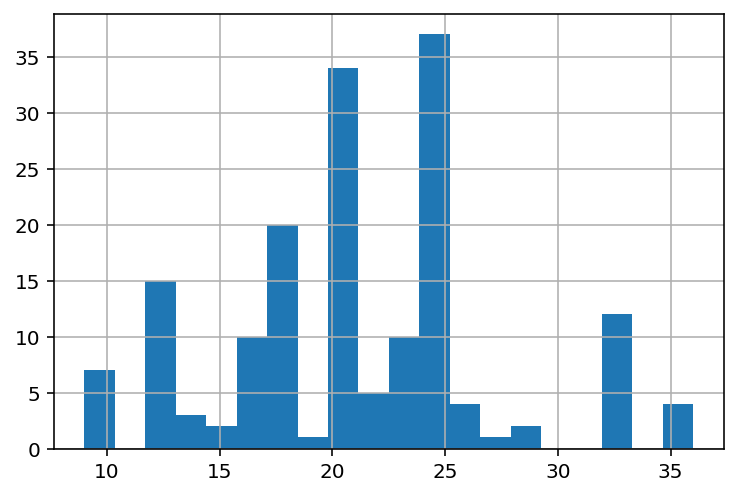

In [28]:
df2.sum_durs.hist(bins = 20)

In [31]:
# compact view for inspection of relevant columns


df3 = df2[ready_classify]
df3.shape

(167, 8)

In [32]:
# run the classifier on the newly curated list of groups

classified2 = df3.applymap(lists_to_tuples_a).groupby("sub_group_id").apply(predict_type_a)

# drop the new singletons

classified2.drop(classified2[classified2['predicted_type'] == "Singleton"].index, inplace = True)

# use the following to filter for particular types--PEN, ID, Fuga

# classified2 = classified2[classified2["predicted_type"] == "ID"]

# classified2.shape

# output to csv
# classified2.to_csv('Model_0001_Classified_2.csv')


In [37]:
c3 = classified2.sort_values(by = ["start_offset"])
c3.head(50)

,pattern_generating_match,pattern_matched,piece_title,part,start_measure,start_beat,start_offset,sub_group_id,predicted_type,offset_diffs,entry_number
0,"(4, 1, 2, 2, -3)","[4, 1, 2, 2, -3]",Ave Maria,[Superius],1,1.0,0.0,55.0,PEN,"[16.0, 16.0, 16.0]",1
2,"(4, 1, 2, 2, -3)","[4, 1, 2, 2, -3]",Ave Maria,Altus,3,1.0,16.0,55.0,PEN,"[16.0, 16.0, 16.0]",2
3,"(4, 1, 2, 2, -3)","[4, 1, 2, 2, -3]",Ave Maria,Tenor,5,1.0,32.0,55.0,PEN,"[16.0, 16.0, 16.0]",3
4,"(4, 1, 2, 2, -3)","[4, 1, 2, 2, -3]",Ave Maria,Bassus,7,1.0,48.0,55.0,PEN,"[16.0, 16.0, 16.0]",4
5,"(-2, -2, -2, 2, -2)","[-2, -2, -2, 2, -2]",Ave Maria,[Superius],8,1.0,56.0,7.0,PEN,"[16.0, 16.0]",1
6,"(-2, -2, -2, 2, -2)","[-2, -2, -2, 2, -2]",Ave Maria,Altus,10,1.0,72.0,7.0,PEN,"[16.0, 16.0]",2
7,"(-2, -2, -2, 2, -2)","[-2, -2, -2, 2, -2]",Ave Maria,Tenor,12,1.0,88.0,7.0,PEN,"[16.0, 16.0]",3
9,"(1, 1, 2, 2, -3)","[1, 1, 2, 2, -3]",Ave Maria,[Superius],16,3.0,124.0,21.0,PEN,"[16.0, 16.0, 16.0]",1
10,"(1, 1, 2, 2, -3)","[1, 1, 2, 2, -3]",Ave Maria,Altus,18,3.0,140.0,21.0,PEN,"[16.0, 16.0, 16.0]",2
18,"(-2, -2, -2, -2, -2)","[-2, -2, -2, -2, -2]",Ave Maria,[Superius],19,1.0,144.0,0.0,Fuga,[14.0],1


In [35]:
classified2.head(50)

,pattern_generating_match,pattern_matched,piece_title,part,start_measure,start_beat,start_offset,sub_group_id,predicted_type,offset_diffs,entry_number
18,"(-2, -2, -2, -2, -2)","[-2, -2, -2, -2, -2]",Ave Maria,[Superius],19,1.0,144.0,0.0,Fuga,[14.0],1
19,"(-2, -2, -2, -2, -2)","[-2, -2, -2, -2, -2]",Ave Maria,[Superius],20,4.0,158.0,0.0,Fuga,[14.0],2
177,"(-2, -2, -2, -2, 1)","[-2, -2, -2, -2, 1]",Ave Maria,Altus,95,1.0,756.0,2.0,Fuga,[48.0],1
178,"(-2, -2, -2, -2, 1)","[-2, -2, -2, -2, 1]",Ave Maria,Altus,99,1.0,804.0,2.0,Fuga,[48.0],2
176,"(-2, -2, -2, -2, 1)","[-2, -2, -2, -2, 1]",Ave Maria,[Superius],104,1.0,864.0,3.0,Fuga,[8.0],1
179,"(-2, -2, -2, -2, 1)","[-2, -2, -2, -2, 1]",Ave Maria,Tenor,104,3.0,872.0,3.0,Fuga,[8.0],2
204,"(-2, -2, -2, -2, 2)","[-2, -2, -2, -2, 2]",Ave Maria,Altus,27,3.0,212.0,4.0,Fuga,[7.0],1
209,"(-2, -2, -2, -2, 2)","[-2, -2, -2, -2, 2]",Ave Maria,Tenor,28,2.5,219.0,4.0,Fuga,[7.0],2
210,"(-2, -2, -2, -2, 2)","[-2, -2, -2, -2, 2]",Ave Maria,Bassus,129,3.0,1092.0,5.0,Fuga,"[14.0, 28.0]",1
207,"(-2, -2, -2, -2, 2)","[-2, -2, -2, -2, 2]",Ave Maria,Altus,131,2.0,1106.0,5.0,Fuga,"[14.0, 28.0]",2
